In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df_bike = pd.read_csv('/content/drive/My Drive/Designing AI/Week 5/Mini Project/202502-divvy-tripdata.csv')
df_bike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A246CA24873F7C5C,classic_bike,2025-02-25 21:21:21.171,2025-02-25 21:30:09.941,Michigan Ave & Lake St,TA1305000011,Clark St & Elm St,TA1307000039,41.886022,-87.624398,41.902973,-87.631280,member
1,303C0906F3F068AE,classic_bike,2025-02-08 14:55:13.493,2025-02-08 15:13:39.890,Ogden Ave & Race Ave,13194,Clark St & Elm St,TA1307000039,41.891795,-87.658751,41.902973,-87.631280,member
2,A0F65F3531F1FB2B,electric_bike,2025-02-24 00:32:56.553,2025-02-24 00:38:21.711,Michigan Ave & Lake St,TA1305000011,Wabash Ave & 9th St,TA1309000010,41.886022,-87.624398,41.870769,-87.625734,casual
3,CE663C815B6A6D73,electric_bike,2025-02-07 17:00:38.646,2025-02-07 17:34:29.012,Ogden Ave & Race Ave,13194,Clark St & Elm St,TA1307000039,41.891795,-87.658751,41.902973,-87.631280,casual
4,43F626BEF919D026,classic_bike,2025-02-10 14:56:56.565,2025-02-10 15:01:18.745,Clark St & North Ave,13128,Clark St & Elm St,TA1307000039,41.911974,-87.631942,41.902973,-87.631280,member


In [5]:
df_bike.info()
df_bike.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151880 entries, 0 to 151879
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             151880 non-null  object 
 1   rideable_type       151880 non-null  object 
 2   started_at          151880 non-null  object 
 3   ended_at            151880 non-null  object 
 4   start_station_name  125952 non-null  object 
 5   start_station_id    125952 non-null  object 
 6   end_station_name    124631 non-null  object 
 7   end_station_id      124631 non-null  object 
 8   start_lat           151880 non-null  float64
 9   start_lng           151880 non-null  float64
 10  end_lat             151823 non-null  float64
 11  end_lng             151823 non-null  float64
 12  member_casual       151880 non-null  object 
dtypes: float64(4), object(9)
memory usage: 15.1+ MB


,start_lat,start_lng,end_lat,end_lng
count,151880.000000,151880.000000,151823.000000,151823.000000
mean,41.896795,-87.646117,41.897057,-87.646337
std,0.048146,0.027529,0.048263,0.027655
min,41.648501,-87.890000,41.648501,-87.890000
25%,41.879255,-87.660000,41.879255,-87.660000
50%,41.891847,-87.641823,41.892278,-87.641823
75%,41.922167,-87.630000,41.922695,-87.630000
max,42.070000,-87.520000,42.070000,-87.520000


In [6]:
# prompt: convert "started_at" and "ended_at" to time date type

import pandas as pd
df_bike['started_at'] = pd.to_datetime(df_bike['started_at'])
df_bike['ended_at'] = pd.to_datetime(df_bike['ended_at'])
df_bike.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A246CA24873F7C5C,classic_bike,2025-02-25 21:21:21.171,2025-02-25 21:30:09.941,Michigan Ave & Lake St,TA1305000011,Clark St & Elm St,TA1307000039,41.886022,-87.624398,41.902973,-87.631280,member
1,303C0906F3F068AE,classic_bike,2025-02-08 14:55:13.493,2025-02-08 15:13:39.890,Ogden Ave & Race Ave,13194,Clark St & Elm St,TA1307000039,41.891795,-87.658751,41.902973,-87.631280,member
2,A0F65F3531F1FB2B,electric_bike,2025-02-24 00:32:56.553,2025-02-24 00:38:21.711,Michigan Ave & Lake St,TA1305000011,Wabash Ave & 9th St,TA1309000010,41.886022,-87.624398,41.870769,-87.625734,casual
3,CE663C815B6A6D73,electric_bike,2025-02-07 17:00:38.646,2025-02-07 17:34:29.012,Ogden Ave & Race Ave,13194,Clark St & Elm St,TA1307000039,41.891795,-87.658751,41.902973,-87.631280,casual
4,43F626BEF919D026,classic_bike,2025-02-10 14:56:56.565,2025-02-10 15:01:18.745,Clark St & North Ave,13128,Clark St & Elm St,TA1307000039,41.911974,-87.631942,41.902973,-87.631280,member


In [7]:
print(df_bike.isnull().sum())

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    25928
start_station_id      25928
end_station_name      27249
end_station_id        27249
start_lat                 0
start_lng                 0
end_lat                  57
end_lng                  57
member_casual             0
dtype: int64


In [8]:
print(df_bike.info())
df_bike = df_bike.dropna()
print(df_bike.isnull().sum())
print(df_bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151880 entries, 0 to 151879
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             151880 non-null  object        
 1   rideable_type       151880 non-null  object        
 2   started_at          151880 non-null  datetime64[ns]
 3   ended_at            151880 non-null  datetime64[ns]
 4   start_station_name  125952 non-null  object        
 5   start_station_id    125952 non-null  object        
 6   end_station_name    124631 non-null  object        
 7   end_station_id      124631 non-null  object        
 8   start_lat           151880 non-null  float64       
 9   start_lng           151880 non-null  float64       
 10  end_lat             151823 non-null  float64       
 11  end_lng             151823 non-null  float64       
 12  member_casual       151880 non-null  object        
dtypes: datetime64[ns](2), float64

Understanding Usage Patterns: How do annual members and casual riders engage with Divvy Bikes differently? We want to uncover preferences, ride frequencies, trip durations, and reasons that set these groups apart.

1. Ride Frequency by Member Types

In [9]:
# Ride frequency: count of rides per user type
ride_frequency = df_bike.groupby('member_casual')['ride_id'].count().reset_index(name='ride_count')
print(ride_frequency)


  member_casual  ride_count
0        casual       19632
1        member       89937


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


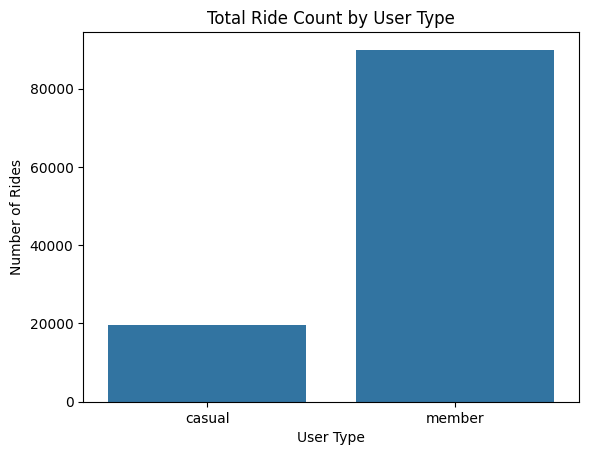

In [13]:
sns.barplot(data=ride_frequency, x='member_casual', y='ride_count')
plt.title("Total Ride Count by User Type")
plt.xlabel("User Type")
plt.ylabel("Number of Rides")
plt.show()

This plot reveals whether casual riders or members use Divvy bikes more frequently overall. Typically, members take more total rides, suggesting higher regular usage compared to casual users.

2. Average Trip Duration by User Type


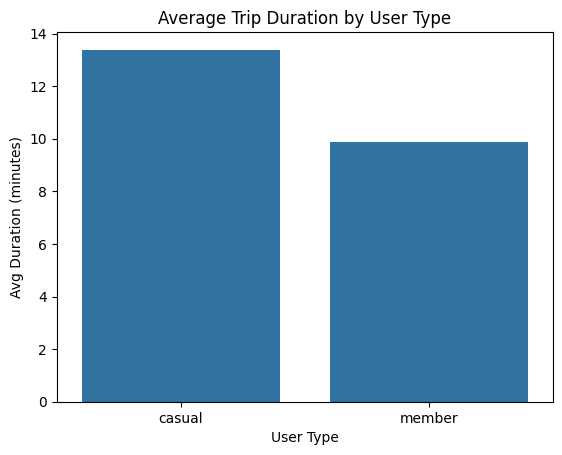

In [15]:
df_bike['started_at'] = pd.to_datetime(df_bike['started_at'])
df_bike['ended_at'] = pd.to_datetime(df_bike['ended_at'])
df_bike['trip_duration_min'] = (df_bike['ended_at'] - df_bike['started_at']).dt.total_seconds() / 60

avg_duration = df_bike.groupby('member_casual')['trip_duration_min'].mean().reset_index()

sns.barplot(data=avg_duration, x='member_casual', y='trip_duration_min')
plt.title("Average Trip Duration by User Type")
plt.xlabel("User Type")
plt.ylabel("Avg Duration (minutes)")
plt.show()

Casual riders tend to have longer ride durations, which could indicate leisure-based usage, while members take shorter trips, likely for commuting or regular short-distance travel.



3. Most Popular Start and End Stations

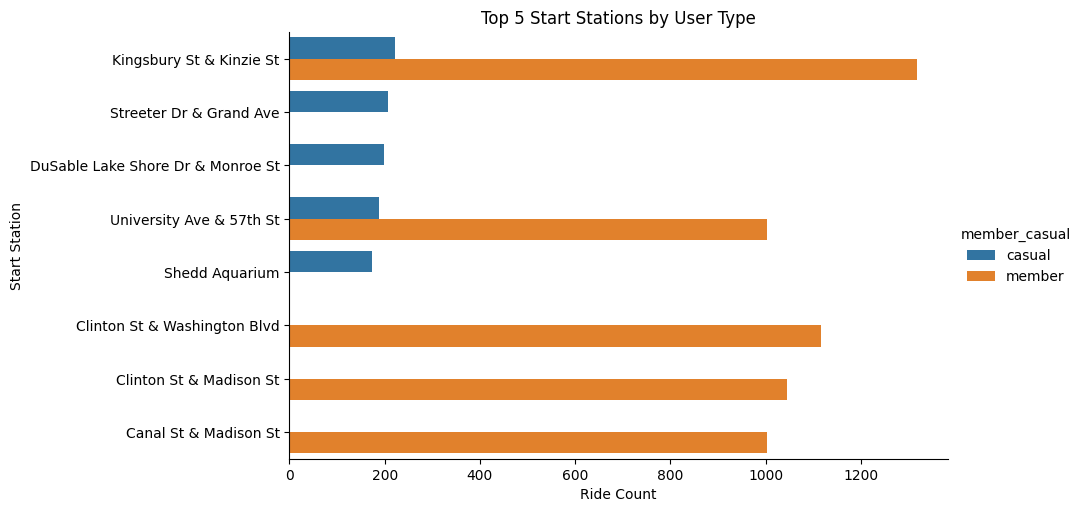

In [16]:
top_start = df_bike.groupby(['member_casual', 'start_station_name']).size().reset_index(name='count')
top_start = top_start.sort_values(['member_casual', 'count'], ascending=[True, False]).groupby('member_casual').head(5)

sns.catplot(data=top_start, kind='bar', x='count', y='start_station_name', hue='member_casual', height=5, aspect=2)
plt.title("Top 5 Start Stations by User Type")
plt.xlabel("Ride Count")
plt.ylabel("Start Station")
plt.show()

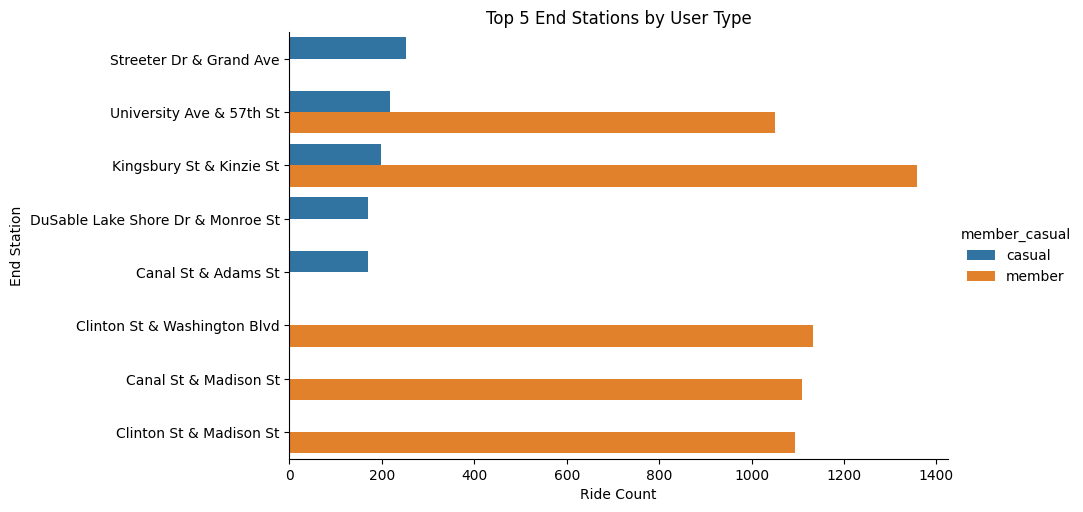

In [17]:
top_end = df_bike.groupby(['member_casual', 'end_station_name']).size().reset_index(name='count')
top_end = top_end.sort_values(['member_casual', 'count'], ascending=[True, False]).groupby('member_casual').head(5)

sns.catplot(data=top_end, kind='bar', x='count', y='end_station_name', hue='member_casual', height=5, aspect=2)
plt.title("Top 5 End Stations by User Type")
plt.xlabel("Ride Count")
plt.ylabel("End Station")
plt.show()

 Casual riders frequently begin and end their trips at stations near tourist attractions, parks, shopping areas, and entertainment districts. This suggests that casual users primarily engage in leisure and recreational rides, often exploring the city or traveling short distances for enjoyment. Their trips tend to be one-way and more spontaneous, especially during weekends or holidays. In contrast, annual members often start and end their rides at stations located near residential neighborhoods, business districts, and public transportation hubs. This indicates that members use Divvy bikes as a regular mode of transport for commuting, last-mile connectivity, or daily errands. Their usage is more consistent, especially during weekday mornings and evenings, aligning with traditional work schedules.

4. Bike Type Preferences

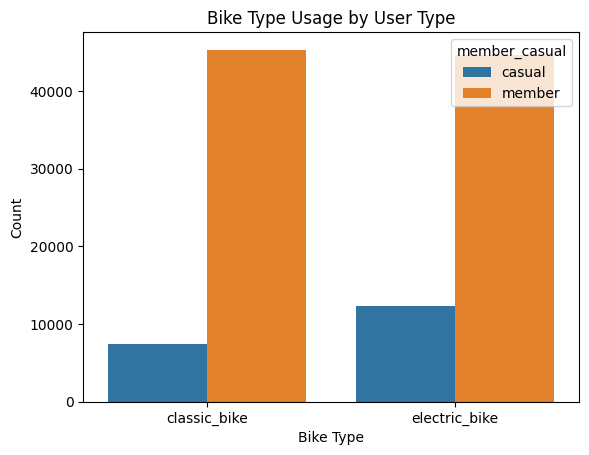

In [18]:
bike_pref = df_bike.groupby(['member_casual', 'rideable_type']).size().reset_index(name='count')

sns.barplot(data=bike_pref, x='rideable_type', y='count', hue='member_casual')
plt.title("Bike Type Usage by User Type")
plt.xlabel("Bike Type")
plt.ylabel("Count")
plt.show()

Casual users may prefer electric bikes for ease, while members may opt for classic bikes possibly due to cost-effectiveness or habit

5. Ride Patterns by Hour of Day

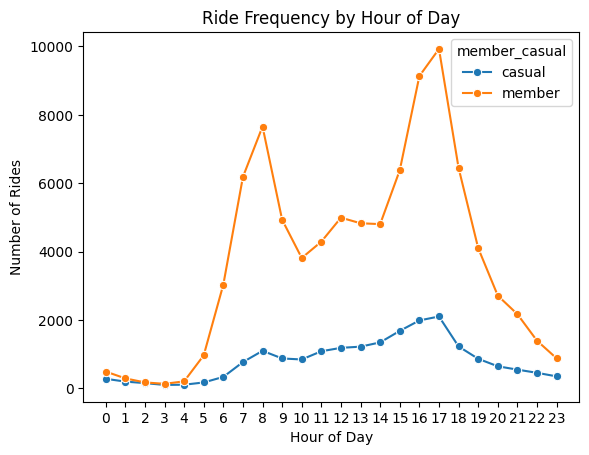

In [19]:
df_bike['hour'] = pd.to_datetime(df_bike['started_at']).dt.hour

hourly_usage = df_bike.groupby(['member_casual', 'hour']).size().reset_index(name='ride_count')

sns.lineplot(data=hourly_usage, x='hour', y='ride_count', hue='member_casual', marker="o")
plt.title("Ride Frequency by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")
plt.xticks(range(0, 24))
plt.show()


Members peak during commute hours (e.g., 8 AM & 5 PM), suggesting work-related use. Casual riders peak midday to evening, reflecting recreational or flexible usage.

6. Ride Patterns by Day of Week

<ipython-input-20-9c2ddd53d80e>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_usage = df_bike.groupby(['member_casual', 'day_of_week']).size().reset_index(name='ride_count')


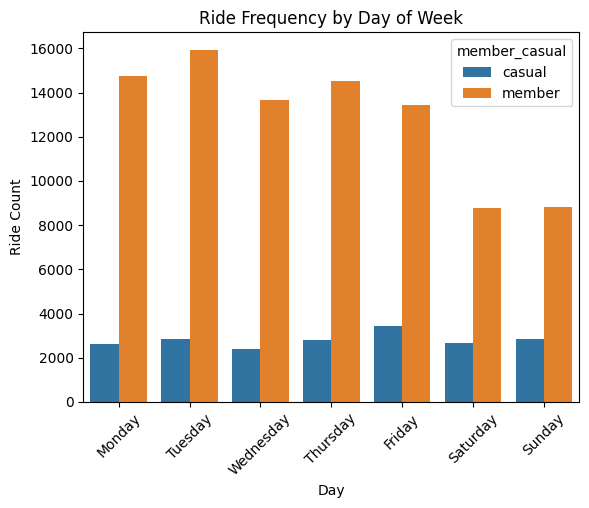

In [20]:
df_bike['day_of_week'] = pd.to_datetime(df_bike['started_at']).dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_bike['day_of_week'] = pd.Categorical(df_bike['day_of_week'], categories=day_order, ordered=True)

daily_usage = df_bike.groupby(['member_casual', 'day_of_week']).size().reset_index(name='ride_count')

sns.barplot(data=daily_usage, x='day_of_week', y='ride_count', hue='member_casual')
plt.title("Ride Frequency by Day of Week")
plt.xlabel("Day")
plt.ylabel("Ride Count")
plt.xticks(rotation=45)
plt.show()


The day-of-week analysis shows that casual riders peak on weekends, indicating leisure or recreational use, while annual members ride more consistently on weekdays, reflecting commuting behavior. Casual usage drops during the week, whereas members maintain steady weekday activity with slight dips on weekends. These patterns suggest Divvy should prioritize bike availability in tourist areas on weekends for casual users and focus on commuter zones during weekdays for members.